Step memodelkan data dengan Machine Learning :

- Import library
- Siapkan Dataset
    - Data Cleansing (handling missing value, outlier, dll)
    - Feature Engineering (encoding, scaling, dll)
- Deklarasi Model
- Training Model
    - Model Optimization (tuning parameter, tweaking, dll) (todo)
    - Jangan lupa disave
- Gunakan Model
    - Evaluasi
    - Inference
    - Deployment

In [72]:
# Import Library
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle
import matplotlib.pyplot as plt

In [45]:
# Persiapkan Data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
# Pisahkan anatara fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)


In [48]:
# Deklarasikan scaler
scaler = StandardScaler()

# Scale data training 
X_train_scaled = scaler.fit_transform(X_train)

# Scale data test
X_test_scaled = scaler.transform(X_test)

In [49]:
# Deklarasikan model

knn = KNeighborsClassifier(n_neighbors=3)


In [50]:
# training model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# Prediksi data test 
y_pred = knn.predict(X_test_scaled)

# Evaluasi model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        81
           1       0.57      0.60      0.58        35

    accuracy                           0.74       116
   macro avg       0.70      0.70      0.70       116
weighted avg       0.75      0.74      0.74       116



In [52]:
# save model
with open('model_knn.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

### Choose K

In [53]:
# loop k dan train masing-masing K
max_k = 30
training = []
testing = []

for k in range(1, max_k+1):
    # deklarasi
    knn_loop = KNeighborsClassifier(n_neighbors=k)

    # training
    knn_loop.fit(X_train_scaled, y_train)

    # evaluasi training 
    score_training = knn_loop.score(X_train_scaled, y_train)
    training.append(score_training)

    # evaluasi testing
    score_testing = knn_loop.score(X_test_scaled, y_test)
    testing.append(score_testing)

In [54]:
metrics = pd.DataFrame({'training':training, 'testing':testing})

<AxesSubplot:>

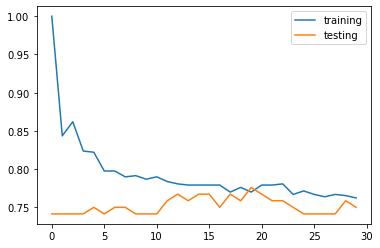

In [55]:
metrics.plot()

In [56]:
metrics[metrics['testing'] == metrics['testing'].max()]

,training,testing
19,0.769939,0.775862


## Naive Bayes

In [57]:
# Import Library
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import pickle
import matplotlib as plt

In [58]:
# Persiapkan Data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
# Pisahkan anatara fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)


In [60]:
# Deklarasikan scaler
scaler = StandardScaler()

# Scale data training 
X_train_scaled = scaler.fit_transform(X_train)

# Scale data test
X_test_scaled = scaler.transform(X_test)

In [61]:
nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

GaussianNB()

In [62]:
y_pred = nb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        79
           1       0.61      0.59      0.60        37

    accuracy                           0.75       116
   macro avg       0.71      0.71      0.71       116
weighted avg       0.75      0.75      0.75       116



In [63]:
nb.predict(X_test)[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [64]:
nb.predict_proba(X_test)[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_pred, y_pred_proba)

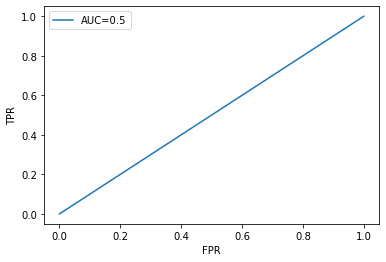

In [73]:
plt.plot(fpr, tpr, label=f'AUC={auc}')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()